In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import numpy as np
ACCURACY_THRESHOLD = 0.95


In [2]:
inc=InceptionV3(input_shape = (150,150,3),include_top  = False,weights='imagenet')

In [3]:
for i in inc.layers:
    i.trainable=False
    

In [4]:
from keras.layers import Flatten, Dense, Input, BatchNormalization, merge
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
x=Flatten()(inc.output)

In [5]:
pred=Dense(10,activation="softmax")(x)

In [6]:
model=Model(inputs=inc.input, outputs=pred)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [8]:
last_layer = model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [9]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation = 'sigmoid')(x)           

model = Model(model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

C:\Users\USER\anaconda3\envs\ML\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


 activation_16 (Activation)     (None, 16, 16, 96)   0           ['batch_normalization_16[0][0]'] 
                                                                                                  
 average_pooling2d_1 (AveragePo  (None, 16, 16, 256)  0          ['mixed0[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_12 (Conv2D)             (None, 16, 16, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_14 (Conv2D)             (None, 16, 16, 64)   76800       ['activation_13[0][0]']          
                                                                                                  
 conv2d_17 (Conv2D)             (None, 16, 16, 96)   82944       ['activation_16[0][0]']          
          

                                                                                                  
 activation_21 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 activation_24 (Activation)     (None, 16, 16, 96)   0           ['batch_normalization_24[0][0]'] 
                                                                                                  
 activation_25 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_25[0][0]'] 
                                                                                                  
 mixed2 (Concatenate)           (None, 16, 16, 288)  0           ['activation_19[0][0]',          
                                                                  'activation_21[0][0]',          
                                                                  'activation_24[0][0]',          
          

                                                                                                  
 activation_32 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_32[0][0]'] 
                                                                                                  
 activation_37 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_37[0][0]'] 
                                                                                                  
 average_pooling2d_3 (AveragePo  (None, 7, 7, 768)   0           ['mixed3[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_30 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed3[0][0]']                 
                                                                                                  
 conv2d_33

 average_pooling2d_4 (AveragePo  (None, 7, 7, 768)   0           ['mixed4[0][0]']                 
 oling2D)                                                                                         
                                                                                                  
 conv2d_40 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed4[0][0]']                 
                                                                                                  
 conv2d_43 (Conv2D)             (None, 7, 7, 192)    215040      ['activation_42[0][0]']          
                                                                                                  
 conv2d_48 (Conv2D)             (None, 7, 7, 192)    215040      ['activation_47[0][0]']          
                                                                                                  
 conv2d_49 (Conv2D)             (None, 7, 7, 192)    147456      ['average_pooling2d_4[0][0]']    
          

 conv2d_53 (Conv2D)             (None, 7, 7, 192)    215040      ['activation_52[0][0]']          
                                                                                                  
 conv2d_58 (Conv2D)             (None, 7, 7, 192)    215040      ['activation_57[0][0]']          
                                                                                                  
 conv2d_59 (Conv2D)             (None, 7, 7, 192)    147456      ['average_pooling2d_5[0][0]']    
                                                                                                  
 batch_normalization_50 (BatchN  (None, 7, 7, 192)   576         ['conv2d_50[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_53 (BatchN  (None, 7, 7, 192)   576         ['conv2d_53[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_60 (BatchN  (None, 7, 7, 192)   576         ['conv2d_60[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_63 (BatchN  (None, 7, 7, 192)   576         ['conv2d_63[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_68 (BatchN  (None, 7, 7, 192)   576         ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_nor

In [10]:
#Getting the dataset 
#path_dataset = os.getcwd +"/C:/Users/USER/Desktop/ML_Assignment/fruits-360_dataset/fruits-360"import os

import os

folder = './PetImages'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders)

['Cat', 'Dog', 'Test', 'Train']


In [11]:
#Defining dataset path and finding number of files
#import os 
cat = os.path.join("C:/Users/USER/Desktop/ML_Assignment/PetImages/Cat")
dog = os.path.join("C:/Users/USER/Desktop/ML_Assignment/PetImages/Dog")
print('Total Cat Images:',len(os.listdir(cat)))
print('Total Dog Images:',len(os.listdir(dog)))

Total Cat Images: 12501
Total Dog Images: 12501


In [12]:
#List of Cat and Dog Images
Cat_files = os.listdir(cat) 
print(Cat_files[:10])
Dog_files = os.listdir(dog) 
print(Dog_files[:10])

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg']


In [13]:
#T#Train-Test Partitioning
from glob import glob
import os.path
from shutil import copy2

path = '../content/drive/My Drive/PetImages'
test = '../content/drive/My Drive/Test'
train = '../content/drive/My Drive/Train'

if not os.path.exists(test):
	os.makedirs(test)
if not os.path.exists(train):
	os.makedirs(train)
 
for folder in glob(path+'/*'):
		print(folder)
		# find number of images in folder
		no_images_in_folder = len(os.listdir(folder))
		# make new folder inside test and train
		folder_test = test+'/'+folder.split('/')[3]+'/'
		folder_train = train+'/'+folder.split('/')[3]+'/'
		# print(folder_test)
		# print(folder_train)
		if not os.path.exists(folder_test):
			os.makedirs(folder_test)
		if not os.path.exists(folder_train):
			os.makedirs(folder_train)

		print("no of images in this folder: {}".format(no_images_in_folder))
		train_num = int(no_images_in_folder*0.8)
		
		# iterate from 0..test and copy to test
		# iterate test to end and copy to train
		for idx, im in enumerate(glob(folder+'/*')):
			#print(im)
			if idx <= train_num:
			# copy to test
				copy2(im, folder_train)
			else:
			# copy to train
				copy2(im, folder_test)

In [14]:
# Define our example directories and files
train_dir = "C:/Users/USER/Desktop/ML_Assignment/PetImages"
validation_dir = "C:/Users/USER/Desktop/ML_Assignment/PetImages"

train_cat_dir = os.path.join(train_dir,'Cat')
train_dog_dir = os.path.join(train_dir,'Dog')
validation_cat_dir = os.path.join(validation_dir,'Cat')
validation_dog_dir = os.path.join(validation_dir,'Dog')

train_cat_fnames = os.listdir(train_cat_dir)
train_dog_fnames = os.listdir(train_dog_dir)
validation_cat_fnames = os.listdir(validation_cat_dir)
validation_dog_fnames = os.listdir(validation_dog_dir)

print(len(train_cat_fnames))
print(len(train_dog_fnames))
print(len(validation_cat_fnames))
print(len(validation_dog_fnames))

#Expected Output:

12501
12501
12501
12501


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,  # This is the source directory for training images
        target_size=(150,150), 
        batch_size=20,
        class_mode='binary')

# Expected Output:
# Found 787 images belonging to 2 classes.
# Found 195 images belonging to 2 classes.

Found 33327 images belonging to 4 classes.
Found 33327 images belonging to 4 classes.


In [16]:
class myCallback(tf.keras.callbacks.Callback):      
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

In [17]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99% accuracy

callbacks = myCallback()
history = model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             steps_per_epoch = 20,
                             epochs = 3,
                             validation_steps = 10,
                             verbose = 1,
                             callbacks=[callbacks])

C:\Users\USER\AppData\Local\Temp\ipykernel_4944\3256811684.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/3
20/20 [==============================] - 29s 1s/step - loss: -2.3956 - accuracy: 0.3825 - val_loss: -6.7333 - val_accuracy: 0.3600
Epoch 2/3
20/20 [==============================] - 24s 1s/step - loss: -12.7956 - accuracy: 0.3975 - val_loss: -28.3672 - val_accuracy: 0.3500
Epoch 3/3
20/20 [==============================] - 24s 1s/step - loss: -13.9451 - accuracy: 0.3675 - val_loss: -32.8572 - val_accuracy: 0.4550


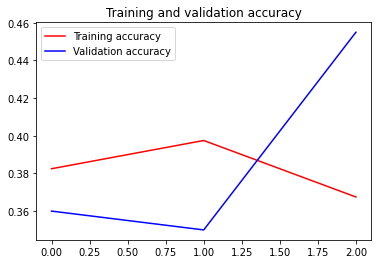

<Figure size 432x288 with 0 Axes>

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Further Improving Accuracy with Fine-Tuning

In [19]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['accuracy'])

C:\Users\USER\anaconda3\envs\ML\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=30,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=1)

Epoch 1/3


C:\Users\USER\AppData\Local\Temp\ipykernel_4944\3110635803.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


30/30 [==============================] - 41s 1s/step - loss: 0.0000e+00 - accuracy: 0.5200 - val_loss: 0.0000e+00 - val_accuracy: 0.5833
Epoch 2/3
30/30 [==============================] - 32s 1s/step - loss: 0.0000e+00 - accuracy: 0.6100 - val_loss: 0.0000e+00 - val_accuracy: 0.6500
Epoch 3/3
30/30 [==============================] - 29s 953ms/step - loss: 0.0000e+00 - accuracy: 0.6678 - val_loss: 0.0000e+00 - val_accuracy: 0.6500


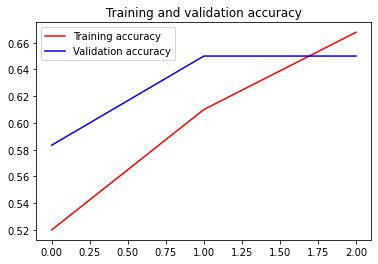

<Figure size 432x288 with 0 Axes>

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [26]:
model.save("inception_model_dropout.h5py")

INFO:tensorflow:Assets written to: inception_model_dropout.h5py\assets
